In [61]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [62]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.01474576 0.16251745 0.01022689 ... 0.09542448 0.13985623 0.14567931]
 [0.00467254 0.05149753 0.00324063 ... 0.03023752 0.04431678 0.04616196]
 [0.01896992 0.20907324 0.01315655 ... 0.12276039 0.17992034 0.18741154]
 ...
 [0.04267923 0.47038074 0.0296001  ... 0.27619089 0.40479147 0.42164545]
 [0.02906086 0.32028849 0.0201551  ... 0.18806204 0.27562788 0.28710398]
 [0.0402463  0.44356662 0.02791275 ... 0.26044659 0.38171627 0.39760949]]

Noisy Matrix (with Homoscedastic Noise):
[[-0.21014987  0.23224041  0.17549337 ...  0.15466898  0.19909124
   0.25115092]
 [-0.09741667  0.13641662 -0.00895843 ... -0.03892912  0.1212619
   0.04736719]
 [-0.19549556  0.3142      0.01551419 ...  0.18625349  0.06779159
   0.07637544]
 ...
 [ 0.13065811  0.50351933  0.05440903 ...  0.28050713  0.46921803
   0.37959577]
 [-0.13021537  0.24545716  0.10025088 ...  0.12683867  0.10419147
   0.18636091]
 [-0.2427045   0.55870698  0.02722133 ...  0.38244795  0.47612136
   0.438

In [63]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [64]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                prior_L="point_laplace") 

 

In [65]:
mycebmf.initialize()
print(mycebmf.L[:,1])

print(mycebmf.F[:,1])

tensor([-0.1109,  0.2820,  0.2003,  0.1378, -0.0462, -0.1031,  0.1324, -0.1455,
         0.0196, -0.1737,  0.2442, -0.3223,  0.1271, -0.2063,  0.1648, -0.1166,
         0.3418,  0.2383, -0.0864,  0.3848,  0.1645,  0.2757,  0.0844, -0.1927,
        -0.1045,  0.3888, -0.1025, -0.2802, -0.0154,  0.0830,  0.1040,  0.0037,
        -0.1520, -0.2993,  0.0101,  0.1740,  0.2491,  0.1710, -0.1464, -0.1431,
         0.0630,  0.0994, -0.2087,  0.0661,  0.1165,  0.2715,  0.1337, -0.0822,
         0.0520,  0.0074])
tensor([-0.0805, -0.0752, -0.0819,  0.0645,  0.2709,  0.1333,  0.1207, -0.2170,
         0.0043, -0.3224, -0.2582,  0.1975,  0.0266,  0.0042,  0.2757, -0.0398,
         0.2269, -0.0064, -0.0752, -0.3092, -0.0727,  0.1810,  0.0317,  0.2609,
        -0.1300,  0.1434,  0.1793,  0.0256,  0.0039, -0.0404, -0.1662, -0.0021,
        -0.0274,  0.0541,  0.2089,  0.1308, -0.1767,  0.2778,  0.0621,  0.0091])


In [66]:
sum(torch.outer(mycebmf.L[:,k], mycebmf.F[:,k]) for k in range(mycebmf.K))

tensor([[-0.1369,  0.1873,  0.0025,  ...,  0.0020,  0.0782,  0.1559],
        [-0.0858,  0.0877, -0.0236,  ...,  0.1615, -0.0417,  0.0698],
        [-0.0919,  0.2050, -0.0309,  ...,  0.1319,  0.1750,  0.2100],
        ...,
        [ 0.0433,  0.4808,  0.0108,  ...,  0.2236,  0.4871,  0.4301],
        [-0.0826,  0.2930,  0.0101,  ...,  0.1401,  0.2457,  0.2472],
        [-0.1365,  0.4987,  0.0134,  ...,  0.2434,  0.3159,  0.4070]])

In [67]:
 mycebmf.L @  mycebmf.F.T

tensor([[-0.1369,  0.1873,  0.0025,  ...,  0.0020,  0.0782,  0.1559],
        [-0.0858,  0.0877, -0.0236,  ...,  0.1615, -0.0417,  0.0698],
        [-0.0919,  0.2050, -0.0309,  ...,  0.1319,  0.1750,  0.2100],
        ...,
        [ 0.0433,  0.4808,  0.0108,  ...,  0.2236,  0.4871,  0.4301],
        [-0.0826,  0.2930,  0.0101,  ...,  0.1401,  0.2457,  0.2472],
        [-0.1365,  0.4987,  0.0134,  ...,  0.2434,  0.3159,  0.4070]])

In [68]:

k=0
f_o=mycebmf.F[:,k]
l_o=mycebmf.L[:,k]
R= noisy_matrix- mycebmf.L@mycebmf.F.T
Rk= mycebmf._partial_residual_masked(k)

print(Rk)


sum( torch.outer(mycebmf.L[:,k], mycebmf.F[:,k])   for k in range(mycebmf.K))

tensor([[-0.0763,  0.2067,  0.1780,  ...,  0.2420,  0.2572,  0.2320],
        [-0.0128,  0.1136,  0.0167,  ..., -0.1646,  0.2176,  0.0324],
        [-0.1072,  0.2989,  0.0523,  ...,  0.1592,  0.0528,  0.0268],
        ...,
        [ 0.0783,  0.5015,  0.0585,  ...,  0.3214,  0.3857,  0.3543],
        [-0.0535,  0.2670,  0.1000,  ...,  0.1606,  0.1237,  0.2052],
        [-0.1154,  0.5441,  0.0289,  ...,  0.4065,  0.5683,  0.4406]])


tensor([[-0.1369,  0.1873,  0.0025,  ...,  0.0020,  0.0782,  0.1559],
        [-0.0858,  0.0877, -0.0236,  ...,  0.1615, -0.0417,  0.0698],
        [-0.0919,  0.2050, -0.0309,  ...,  0.1319,  0.1750,  0.2100],
        ...,
        [ 0.0433,  0.4808,  0.0108,  ...,  0.2236,  0.4871,  0.4301],
        [-0.0826,  0.2930,  0.0101,  ...,  0.1401,  0.2457,  0.2472],
        [-0.1365,  0.4987,  0.0134,  ...,  0.2434,  0.3159,  0.4070]])

In [69]:
import torch

k = 0
Y0   = mycebmf.Y0
M    = mycebmf.mask
L    = mycebmf.L
F    = mycebmf.F

# Clone these to avoid view aliasing issues
l_old = L[:, k].clone()
f_old = F[:, k].clone()

# Baseline residual (masked)
recon = L @ F.T
R     = (Y0 - recon) * M

# Partial residual excluding factor k
Rk = (Y0 - (recon - torch.outer(l_old, f_old))) * M

# 1) First identity: Rk = R + l_old f_old^T  (masked)
print(torch.allclose(Rk, R + torch.outer(l_old, f_old) * M, atol=1e-7))

# Mutate L[:,k] --> l_new
L[:, k] = l_old + 1.0
l_new = L[:, k]  # (this is fine; we already saved l_old above)

# New residual (recompute from scratch, masked)
recon_new = L @ F.T
R_new     = (Y0 - recon_new) * M

# 2) Second identity: R_new = Rk - l_new f_old^T  (masked)
print(torch.allclose(R_new, Rk - torch.outer(l_new, f_old) * M, atol=1e-7))


True
True


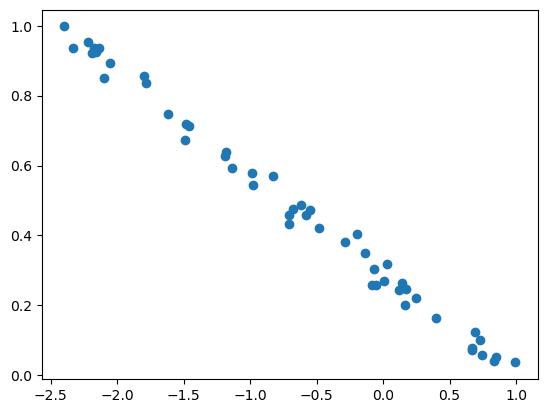

In [70]:
plt.scatter( mycebmf.L[:,0],u)

In [71]:
mycebmf.iter_once()
mycebmf.update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

5


tensor([[-0.1008,  0.1712,  0.0020,  ...,  0.0255,  0.1079,  0.1436],
        [-0.0510,  0.0733, -0.0094,  ...,  0.1144, -0.0035,  0.0598],
        [-0.0473,  0.1961, -0.0093,  ...,  0.1185,  0.1842,  0.1834],
        ...,
        [ 0.0213,  0.4803,  0.0033,  ...,  0.2463,  0.4545,  0.4194],
        [-0.0422,  0.3080,  0.0034,  ...,  0.1511,  0.2577,  0.2597],
        [-0.0687,  0.4918,  0.0048,  ...,  0.2536,  0.3629,  0.4100]])

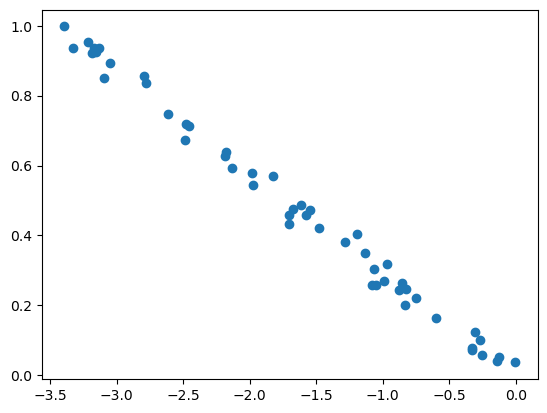

In [72]:
plt.scatter( mycebmf.L[:,0],u)

5


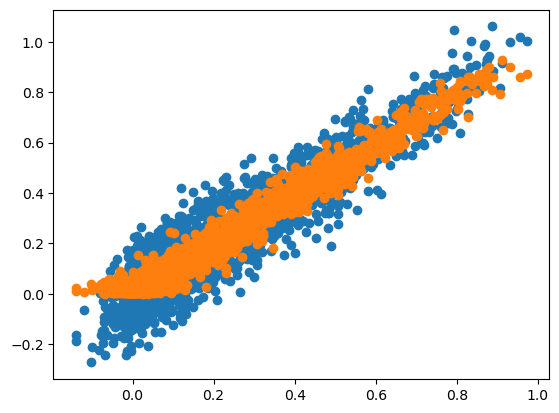

In [73]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [74]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                prior_L="point_laplace") 
mycebmf.initialize()
mycebmf.fit()

5
5
5
5
3
3
3
2
2
2
2
2
2
2
2
2
2


CEBMFResult(L=tensor([[-8.2608e-01],
        [-3.2476e-01],
        [-9.6946e-01],
        [-1.2758e-01],
        [-2.7849e+00],
        [-3.1873e+00],
        [-8.7790e-01],
        [-2.7982e+00],
        [-3.2144e+00],
        [-1.1317e+00],
        [-3.2173e-01],
        [-3.1440e-03],
        [-1.5759e+00],
        [-1.1127e-01],
        [-1.0457e+00],
        [-1.8244e+00],
        [-1.2781e+00],
        [-1.7043e+00],
        [-3.1370e+00],
        [-1.6735e+00],
        [-2.1331e+00],
        [-1.4781e+00],
        [-1.0641e+00],
        [-3.3302e+00],
        [-8.5377e-01],
        [-2.5668e-01],
        [-2.4775e+00],
        [-1.9832e+00],
        [-2.6175e+00],
        [-1.0778e+00],
        [-1.7036e+00],
        [-1.1911e+00],
        [-3.0531e+00],
        [-3.1555e+00],
        [-2.4307e-01],
        [-2.1861e+00],
        [-9.8816e-01],
        [-1.5421e+00],
        [-2.1757e+00],
        [-3.0432e-01],
        [-7.4955e-01],
        [-5.9749e-01],
        [-3.0999e+00

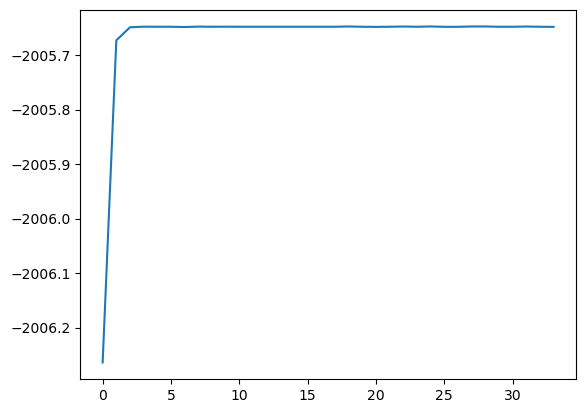

In [75]:
plt.plot(mycebmf.obj)

In [76]:
results =[]
for i in range(50):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                      prior_L="point_laplace") 
    mycebmf.initialize()
    mycebmf.fit()
    
    mycebmf.update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

5
5
5
4
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
4
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
5
2
2
2
5
5
5
3
3
2
5
5
5
4
3
3
3
3
3
3
2
2
2
5
5
5
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
4
4
4
4
4
4
3
2
2
2
2
2
5
5
5
5
3
3
2
2
2
5
5
5
5
4
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
5
4
4
4
3
3
3
3
2
5
5
5
5
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
5
4
4
4
4
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
4
3
2
5
5
5
5
4
3
3
2
5
5
5
5
5
3
3
2
2
2
2
2
5
5
5
5
3
3
3
3
3
3
2
5
5
5
5
5
5
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
5
3
3
3
3
3
3
2
2
2
5
5
5
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
5
5
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
5
5
5
4
3
3
2
5
5
5
4
3
2
5
5
5
3
3
2
2
2
2
2
2
2
2
2
5
5
5
5
4
3
3
2
2


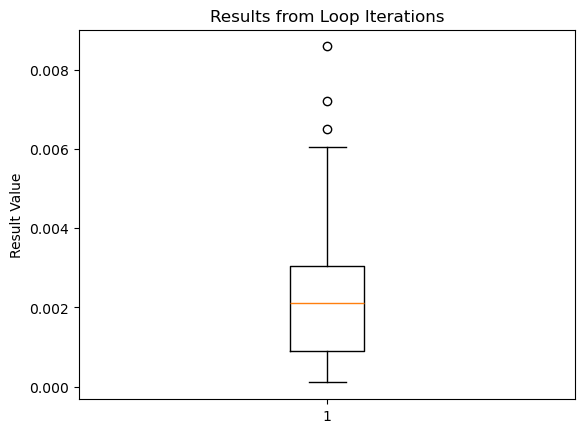

In [77]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [78]:
res= np.asarray(results)
np.mean(res )

np.float64(0.0023748762743019546)

In [79]:
#0.0022667179506868484